In [1]:
import numpy as np
import matplotlib.pyplot as plt

import torch
from torchvision import datasets, transforms
import time

In [2]:
# Download and load the training set
train_dataset = datasets.MNIST(root='/home/zach/intelligent_machines/data', train=True, download=False)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)

# Download and load the test set
test_dataset = datasets.MNIST(root='/home/zach/intelligent_machines/data', train=False, download=False)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

train_images = train_dataset.data.numpy()
train_labels = train_dataset.targets.numpy()

test_images = test_dataset.data.numpy()
test_labels = test_dataset.targets.numpy()

print(train_images.shape)

(60000, 28, 28)


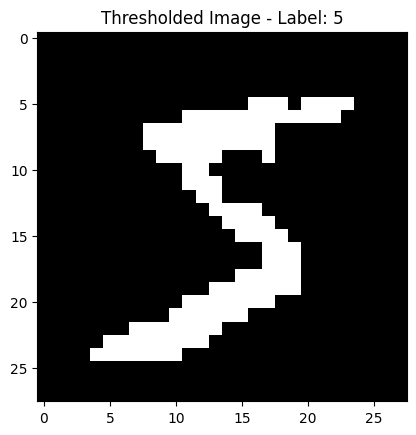

[[-1.  1.  1. -1. -1. -1. -1. -1. -1. -1.]
 [-1.  1.  1.  1. -1. -1. -1. -1. -1. -1.]
 [-1. -1.  1.  1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1.  1.  1.  1.  1. -1. -1. -1.]
 [-1. -1. -1. -1.  1.  1.  1.  1. -1. -1.]
 [-1. -1. -1. -1. -1.  1.  1.  1.  1. -1.]
 [-1. -1. -1. -1. -1. -1. -1.  1.  1.  1.]
 [-1. -1. -1. -1. -1. -1. -1.  1.  1.  1.]
 [-1. -1. -1. -1. -1.  1.  1.  1.  1.  1.]
 [-1. -1. -1.  1.  1.  1.  1.  1.  1.  1.]]


In [3]:
threshold_value = 100  # Pixel intensity threshold (0-255)
train_images = np.where(train_images > threshold_value, 1.0, -1.0)
test_images = np.where(test_images > threshold_value, 1.0, -1.0)

plt.imshow(train_images[0], cmap='gray')
plt.title(f'Thresholded Image - Label: {train_labels[0]}')
plt.show()

print(train_images[0][10:20, 10:20])


In [4]:
shape = train_images[0].shape
N = shape[0] * shape[1]
W = np.zeros((N,N))
print(W.shape)

(784, 784)


In [5]:

selected_images = train_images[:10000]
# Test different batch sizes
batch_size = 100

num_iter = selected_images.shape[0] // batch_size

start = time.time()

# Initialize weight matrix
weight = np.zeros((N, N))

# Process in batches
for i in range(0, num_iter):
    batch = train_images[i*batch_size:i*batch_size + batch_size].reshape(batch_size, -1, 1)
    
    partial_weight = np.matmul(batch, batch.transpose(0, 2, 1))
    weight += np.sum(partial_weight, axis=0)

# Zero out the diagonal
weight[np.eye(N, dtype=bool)] = 0


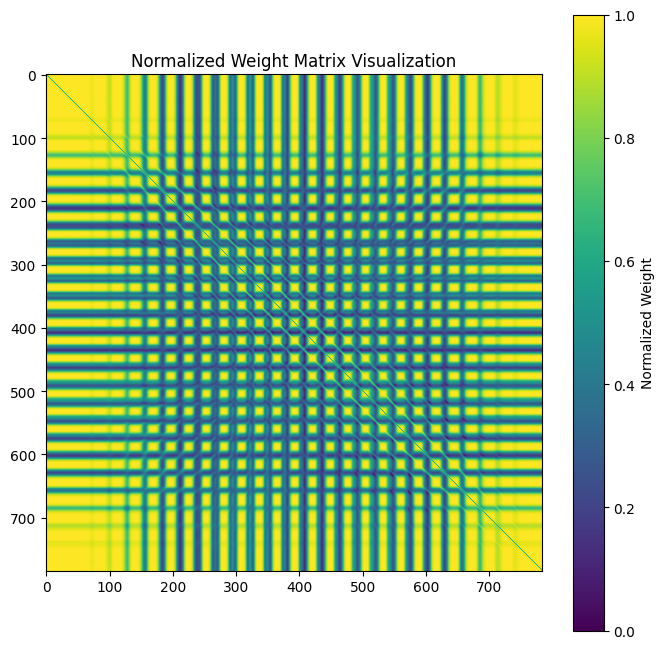

In [154]:
W_norm = (weight - weight.min()) / (weight.max() - weight.min())

# Visualize the weight matrix
plt.figure(figsize=(8, 8))
plt.imshow(W_norm, cmap='viridis')
plt.colorbar(label='Normalized Weight')
plt.title('Normalized Weight Matrix Visualization')
plt.show()

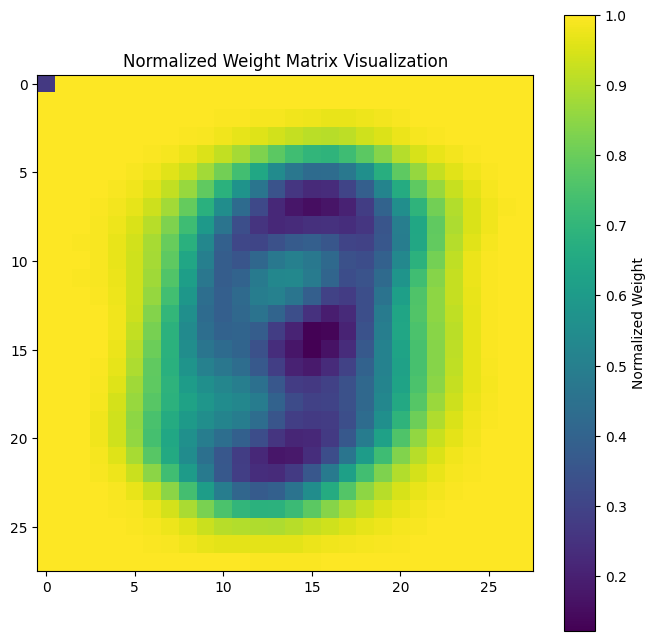

In [173]:
# Visualize the weight matrix
plt.figure(figsize=(8, 8))
plt.imshow(W_norm[0,:].reshape(28,28), cmap='viridis')
plt.colorbar(label='Normalized Weight')
plt.title('Normalized Weight Matrix Visualization')
plt.show()

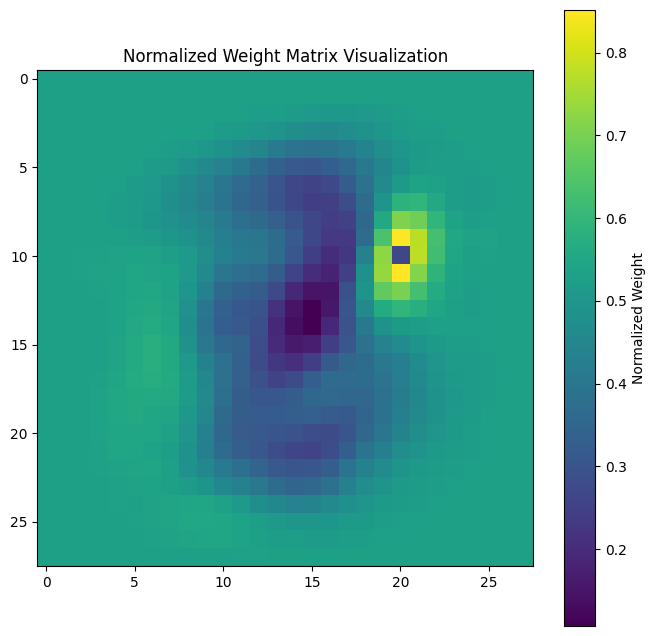

In [174]:
plt.figure(figsize=(8, 8))
plt.imshow(W_norm[300,:].reshape(28,28), cmap='viridis')
plt.colorbar(label='Normalized Weight')
plt.title('Normalized Weight Matrix Visualization')
plt.show()

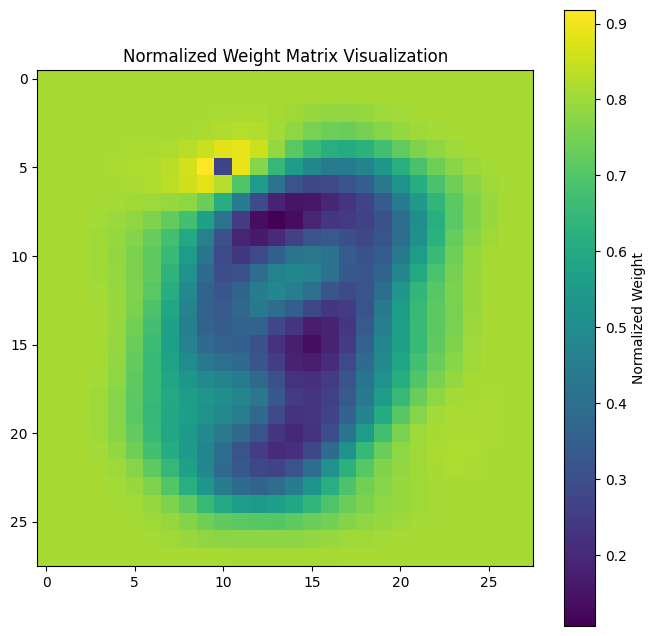

In [175]:
plt.figure(figsize=(8, 8))
plt.imshow(W_norm[150,:].reshape(28,28), cmap='viridis')
plt.colorbar(label='Normalized Weight')
plt.title('Normalized Weight Matrix Visualization')
plt.show()

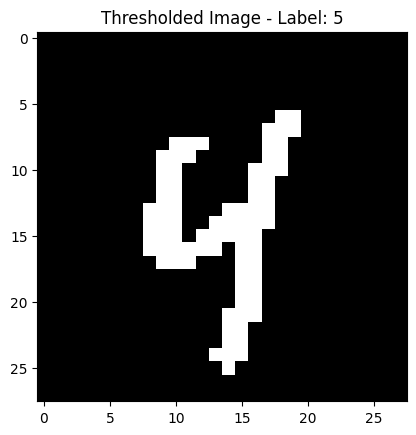

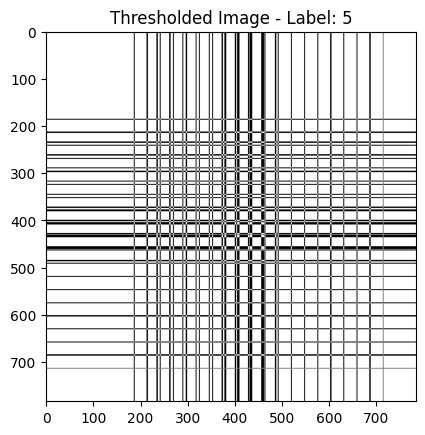

In [155]:
random_img = np.random.random((28,28))

random_img = train_images[2222]

random_img = np.where(random_img > 0.5, 1.0, -1.0)

plt.imshow(random_img, cmap='gray')
plt.title(f'Thresholded Image - Label: {train_labels[0]}')
plt.show()

my_image = np.copy(random_img)

my_image = my_image.reshape(-1,1)

network = np.matmul(my_image, my_image.T)


plt.imshow(network, cmap='gray')
plt.title(f'Thresholded Image - Label: {train_labels[0]}')
plt.show()


In [70]:
from IPython.display import display, clear_output


'Energy: -499.48720198917636'

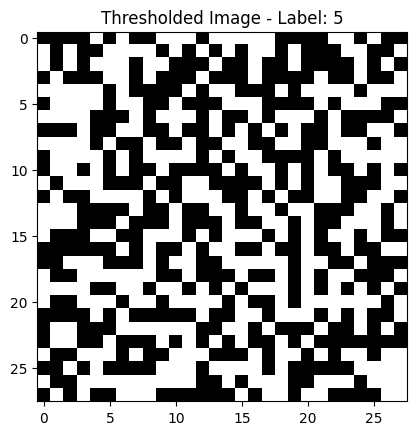

In [172]:
frames = []

for _ in range(100):

    node = np.random.choice(N, 1)[0]

    energy_curr = network[node,:] @ W_norm[node,:]
    energy_flip = -1 * network[node,:] @ W_norm[node,:]

    if energy_flip < energy_curr:
        network[node,:] *= -1
        network[:,node] *= -1

        row_j = node // shape[1]
        col_j = node % shape[1]
        random_img[row_j, col_j] *= -1
        frames.append(random_img)

        clear_output(wait=True)
        display(f"Energy: {np.sum(network * W_norm)}")
        
plt.imshow(random_img, cmap='gray')
plt.title(f'Thresholded Image - Label: {train_labels[0]}')
plt.show()

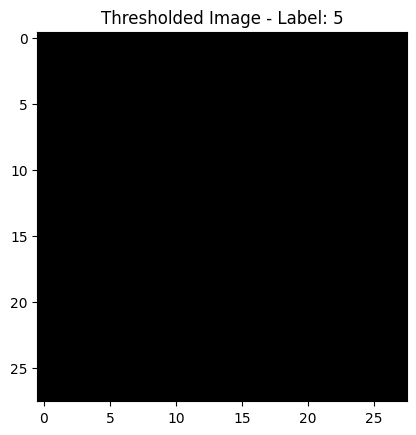

In [ ]:
energy = my_image.reshape(1,-1)

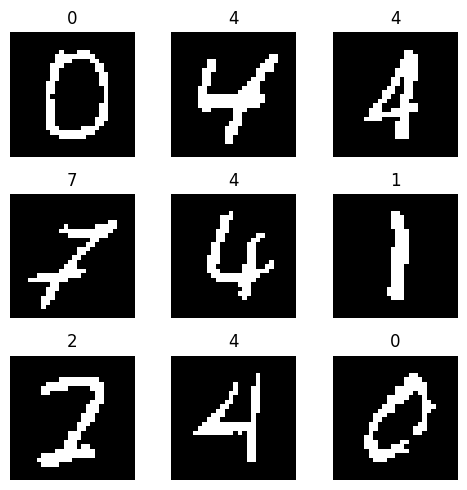

In [16]:
# Get a batch of images
images, labels = next(iter(train_loader))

# Function to show a grid of images
def show_image_grid(images, labels, nrow=3, ncol=3):
    fig, axes = plt.subplots(nrow, ncol, figsize=(5, 5))
    axes = axes.flatten()
    
    for img, ax, label in zip(images[:nrow * ncol], axes, labels[:nrow * ncol]):
        ax.imshow(img.squeeze(), cmap='gray')
        ax.set_title(f'{label.item()}')
        ax.axis('off')
    
    plt.tight_layout()
    plt.show()

# Display the grid
show_image_grid(images, labels)